In [1]:
import os
import sys
from scipy import sparse
from scipy import sparse, io
import pdb


import numpy as np
import pickle
from sklearn.decomposition import NMF, non_negative_factorization
from sklearn.decomposition._nmf import _beta_divergence


script_dir = "../"
sys.path.append(os.path.abspath(script_dir))
from factorize import *
from misc import *
from findK_correction_jk import *



In [4]:
data_dir="../dataset/real_bows"
data_name="nips"
X = io.mmread(f"{data_dir}/{data_name}_X.mtx").astype(float).toarray()

## Compare loss at initialization 

In [7]:
k = 5
fitted_dir = "../output"
outputfile=f"../output/{data_name}_init_{k}.pkl"

file = open(outputfile, 'rb')
out = pickle.load(file)
file.close()

methodname = ['shrink_jk', "rect_shrink_jk", "vanila", "rect", "nndsvd", "random"]
for mn in methodname:
    print(f"{mn}: {out[mn]['loss']}")

shrink_jk: 2486.6617652420873
rect_shrink_jk: 2460.68013254505
vanila: 2536.198355465703
rect: 2536.198355465703
nndsvd: 2497.47448799742
random: 2542.6235648755924


## Compare convergence

In [8]:
%%capture
def exper_init(X,W, H, iters):
    loss = []
    loss.append(_beta_divergence(X, W, H, 1, square_root=True))
    k = W.shape[1]
    for i in iters:
        W, H, _ = non_negative_factorization(X, n_components=k, init='custom', 
                                   random_state=0,W = W, H = H, 
                                  beta_loss='kullback-leibler', solver='mu',
                                  max_iter = i, tol=1e-30)
        loss.append(_beta_divergence(X, W, H, 1, square_root=True))
        
    return loss

iters = [1] * 40
loss = {}
for mn in methodname:
    loss[mn] = exper_init(X, out[mn]['W'].copy(), out[mn]['H'].copy().copy(), iters)

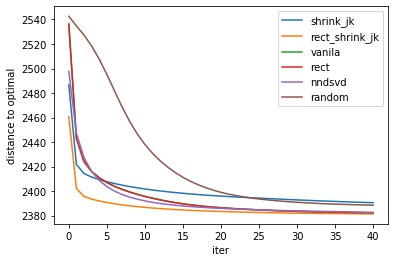

In [10]:
methodname_show = ['shrink_jk', "rect_shrink_jk", "vanila", "rect", "nndsvd", "random"]

for mn in methodname_show:
    plt.plot(np.cumsum([0] + iters), loss[mn] , label = mn)
plt.legend()
plt.xlabel("iter")
plt.ylabel("loss")
plt.show()

## k = 10

In [11]:
k = 10
fitted_dir = "../output"
outputfile=f"../output/{data_name}_init_{k}.pkl"

file = open(outputfile, 'rb')
out = pickle.load(file)
file.close()

methodname = ['shrink_jk', "rect_shrink_jk", "vanila", "rect", "nndsvd", "random"]
for mn in methodname:
    print(f"{mn}: {out[mn]['loss']}")

shrink_jk: 2435.422432893131
rect_shrink_jk: 2374.9222936563488
vanila: 2496.338743816112
rect: 2496.338743816112
nndsvd: 2458.690006561228
random: 2533.9665497299325


In [12]:
%%capture
def exper_init(X,W, H, iters):
    loss = []
    loss.append(_beta_divergence(X, W, H, 1, square_root=True))
    k = W.shape[1]
    for i in iters:
        W, H, _ = non_negative_factorization(X, n_components=k, init='custom', 
                                   random_state=0,W = W, H = H, 
                                  beta_loss='kullback-leibler', solver='mu',
                                  max_iter = i, tol=1e-30)
        loss.append(_beta_divergence(X, W, H, 1, square_root=True))
        
    return loss

iters = [1] * 40
loss = {}
for mn in methodname:
    loss[mn] = exper_init(X, out[mn]['W'].copy(), out[mn]['H'].copy().copy(), iters)

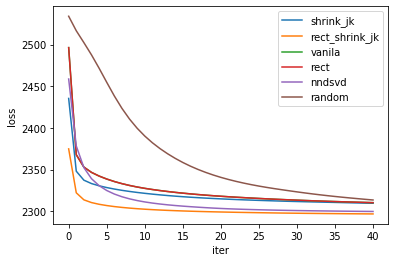

In [13]:
methodname_show = ['shrink_jk', "rect_shrink_jk", "vanila", "rect", "nndsvd", "random"]

for mn in methodname_show:
    plt.plot(np.cumsum([0] + iters), loss[mn] , label = mn)
plt.legend()
plt.xlabel("iter")
plt.ylabel("loss")
plt.show()

## k = 20

In [14]:
k = 20
fitted_dir = "../output"
outputfile=f"../output/{data_name}_init_{k}.pkl"

file = open(outputfile, 'rb')
out = pickle.load(file)
file.close()

methodname = ['shrink_jk', "rect_shrink_jk", "vanila", "rect", "nndsvd", "random"]
for mn in methodname:
    print(f"{mn}: {out[mn]['loss']}")

shrink_jk: 2365.8852341149977
rect_shrink_jk: 2293.8497259096953
vanila: 2442.677977089918
rect: 2442.677977089918
nndsvd: 2425.9911962358588
random: 2522.1966720866053


In [15]:
%%capture
def exper_init(X,W, H, iters):
    loss = []
    loss.append(_beta_divergence(X, W, H, 1, square_root=True))
    k = W.shape[1]
    for i in iters:
        W, H, _ = non_negative_factorization(X, n_components=k, init='custom', 
                                   random_state=0,W = W, H = H, 
                                  beta_loss='kullback-leibler', solver='mu',
                                  max_iter = i, tol=1e-30)
        loss.append(_beta_divergence(X, W, H, 1, square_root=True))
        
    return loss

iters = [1] * 40
loss = {}
for mn in methodname:
    loss[mn] = exper_init(X, out[mn]['W'].copy(), out[mn]['H'].copy().copy(), iters)

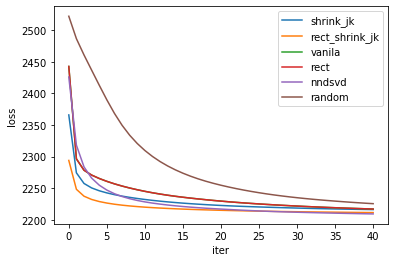

In [16]:
methodname_show = ['shrink_jk', "rect_shrink_jk", "vanila", "rect", "nndsvd", "random"]

for mn in methodname_show:
    plt.plot(np.cumsum([0] + iters), loss[mn] , label = mn)
plt.legend()
plt.xlabel("iter")
plt.ylabel("loss")
plt.show()